## 1. Data Exploration and Pre-processing

In [32]:
import numpy as np 
import pandas as pd 
import os

This code snippet reads in data from a CSV file named "titanic_train.csv" using Pandas and then displays the first few rows of the DataFrame.

In [33]:
train_data = pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

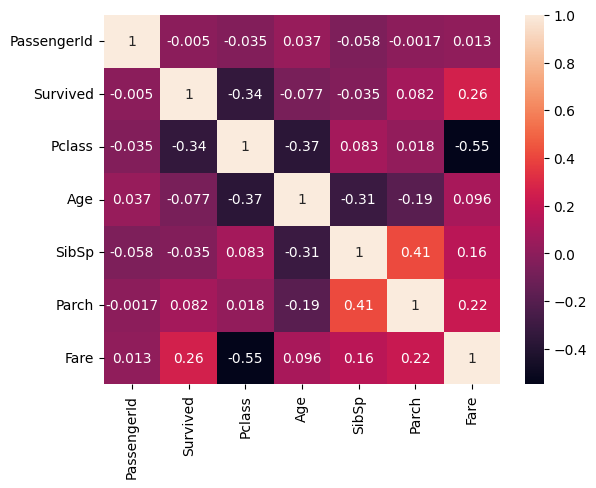

In [34]:
# Drop non-numeric columns
numeric_train_data = train_data.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
sns.heatmap(numeric_train_data.corr(), annot=True)


In [35]:
print(train_data.tail())


     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


## 2. Data Visualization

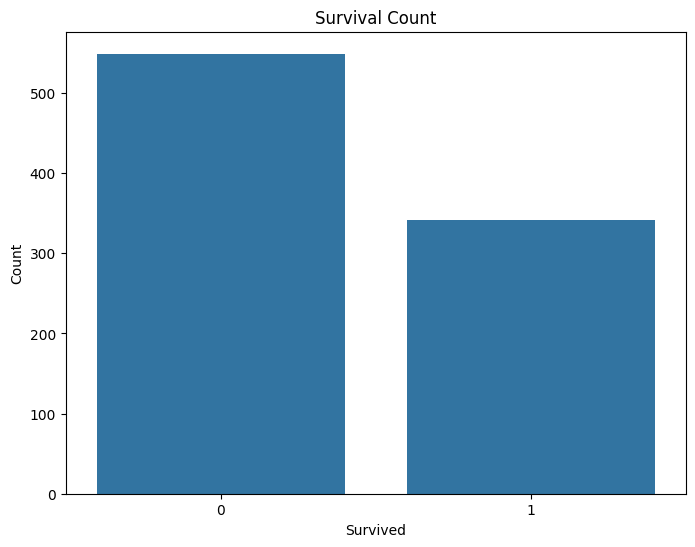

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


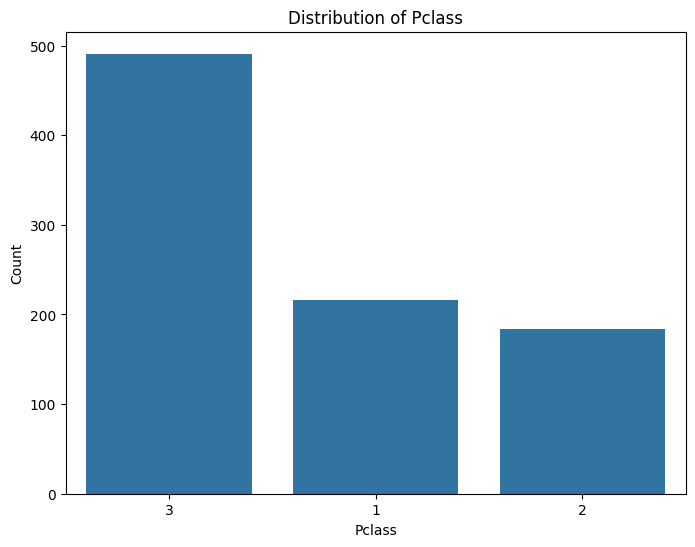

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=train_data, order=train_data['Pclass'].value_counts().index)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


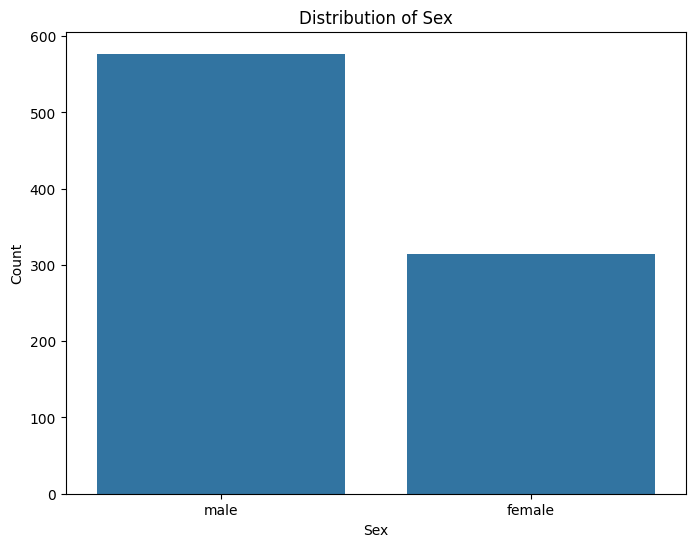

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=train_data, order=train_data['Sex'].value_counts().index)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


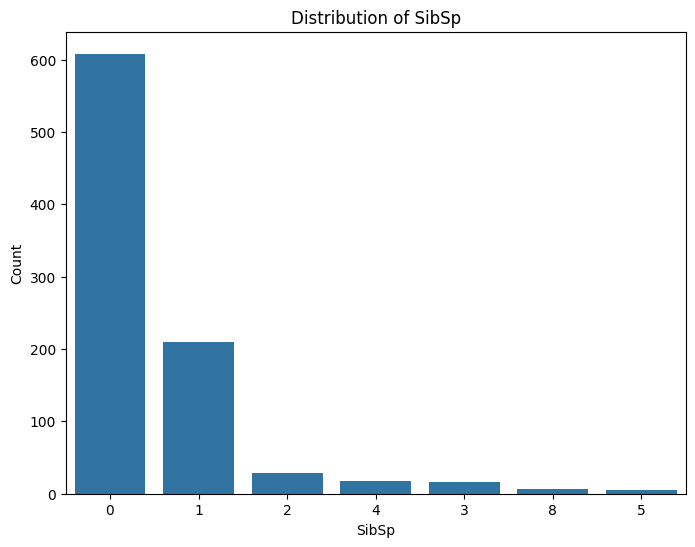

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', data=train_data, order=train_data['SibSp'].value_counts().index)
plt.title('Distribution of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()


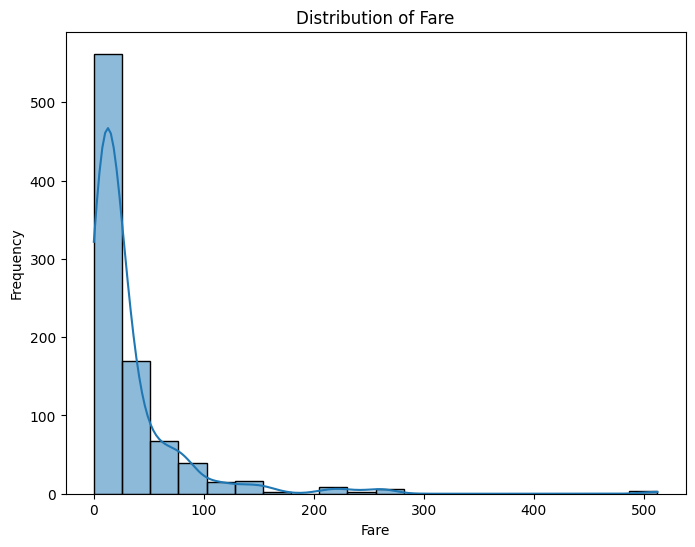

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(train_data['Fare'], bins=20, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


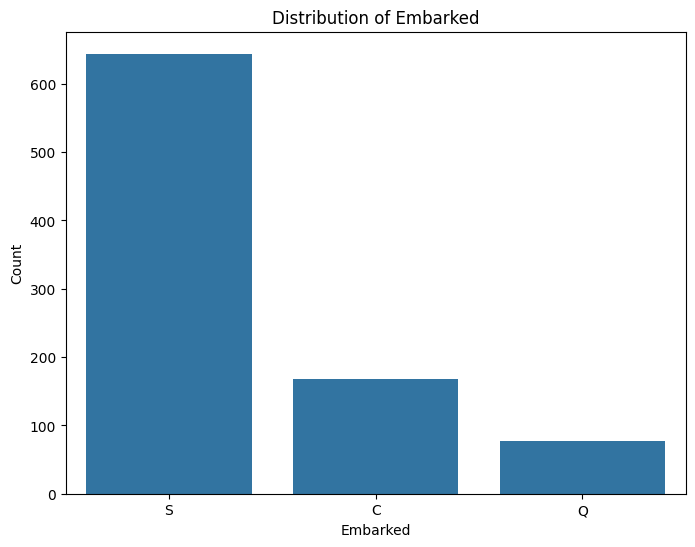

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=train_data, order=train_data['Embarked'].value_counts().index)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Nauman Yaseen\AppData\Local\Temp\ipykernel_17512\2080852517.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(median_age, inplace=True)


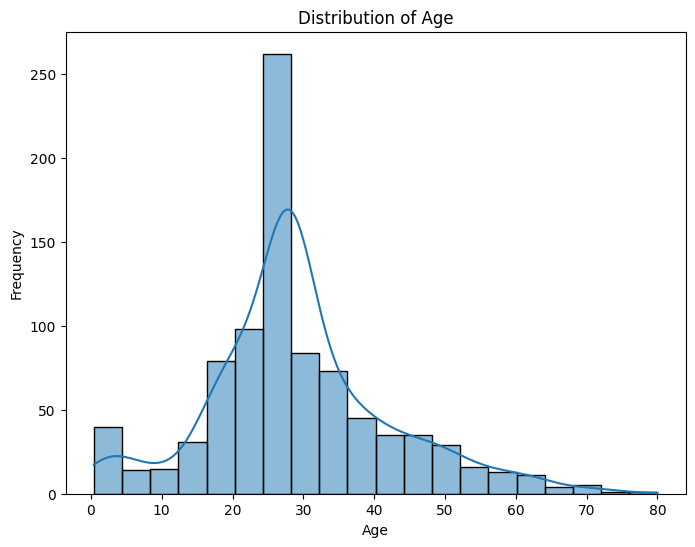

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

median_age = train_data['Age'].median()
train_data['Age'].fillna(median_age, inplace=True)

plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [45]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Top 10 most frequent cabins:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
F2             3
E101           3
D              3
C78            2
C93            2
Name: count, dtype: int64


C:\Users\Nauman Yaseen\AppData\Local\Temp\ipykernel_17512\2576374141.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna(most_common_cabin, inplace=True)


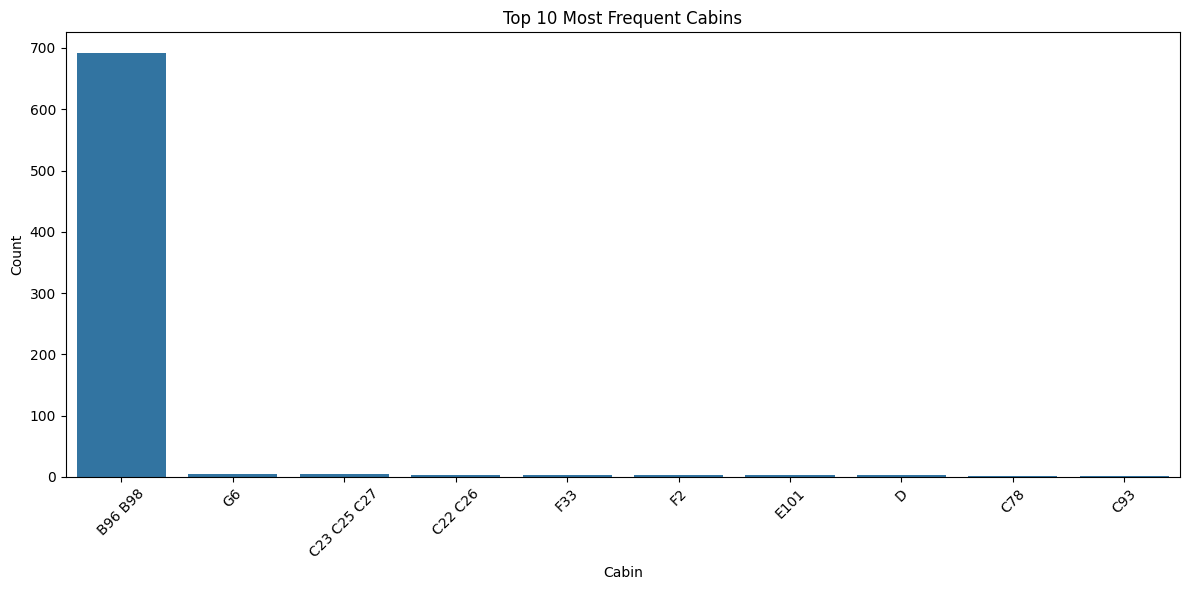

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_10_frequent = train_data['Cabin'].value_counts().head(10)

print("Top 10 most frequent cabins:")
print(top_10_frequent)

most_common_cabin = train_data['Cabin'].mode()[0]
train_data['Cabin'].fillna(most_common_cabin, inplace=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='Cabin', data=train_data, order=top_10_frequent.index)
plt.title('Top 10 Most Frequent Cabins')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

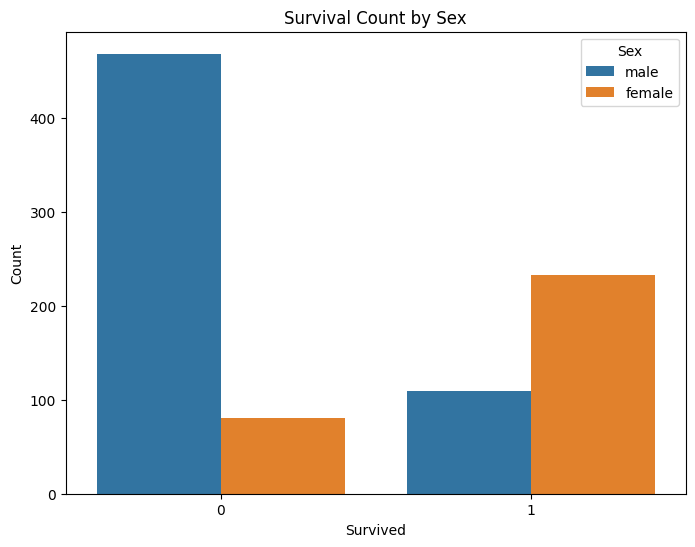

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


In [50]:
test_data = pd.read_csv("titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Model Selection and Training

In [51]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [52]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [53]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [54]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming 'train_data' and 'test_data' are your DataFrames containing the datasets

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# Create a DataFrame with PassengerId and corresponding predictions
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

# Print the DataFrame containing the predictions
print(output)


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


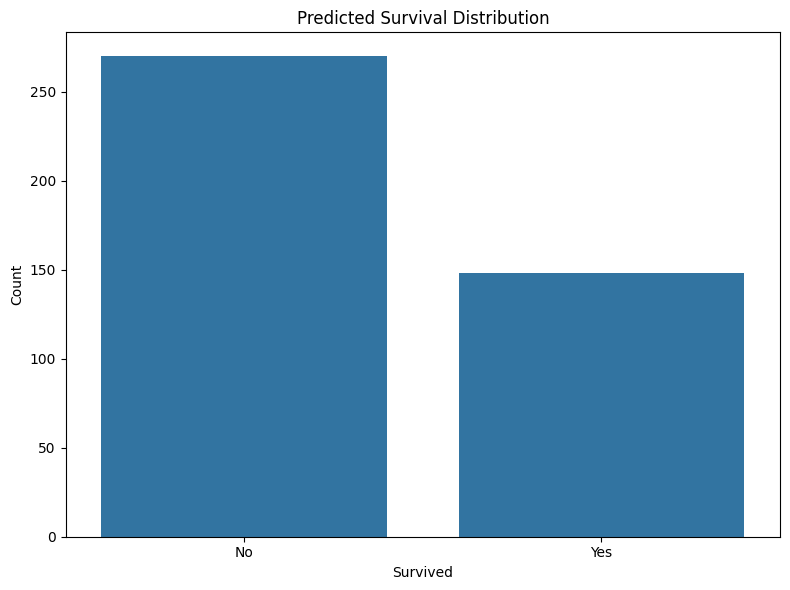

In [55]:
import matplotlib.pyplot as plt

# Assuming 'output' is your DataFrame containing the predictions

# Countplot to visualize the distribution of predicted survival values
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=output)
plt.title('Predicted Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


## 4. Feature Engineering

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the Titanic dataset
train_data = pd.read_csv('titanic_train.csv')

# Feature Engineering: Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

# Encoding categorical variables using OneHotEncoder
categorical_features = ['Sex', 'Embarked']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(train_data[categorical_features])

# Scaling numerical features using StandardScaler
numerical_features = ['Fare', 'Age']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data[numerical_features])

# Feature Selection: Select top features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=3)
selected_features = selector.fit_transform(train_data[['Pclass', 'FamilySize', 'Fare']], train_data['Survived'])

# Prepare transformed DataFrame
transformed_data = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))
transformed_data[numerical_features] = scaled_features
transformed_data[['Pclass', 'FamilySize', 'Fare']] = selected_features

# Save the transformed data to a CSV file
transformed_data.to_csv('transformed_data.csv', index=False)

print("Transformed data saved to 'transformed_data.csv'.")


Transformed data saved to 'transformed_data.csv'.


## 5. Model Selection and Training

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('titanic_train.csv')

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Preprocessing: Handle missing values and encode categorical variables
encoder = OneHotEncoder(drop='first')
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_encoded = encoder.fit_transform(X[['Sex', 'Embarked']])
X_imputed = imputer.fit_transform(X[['Age']])
X_scaled = scaler.fit_transform(X[['Pclass', 'SibSp', 'Parch', 'Fare']])

# Create DataFrame for encoded features with proper column names
encoded_columns = encoder.get_feature_names_out(['Sex', 'Embarked'])
X_preprocessed = pd.DataFrame(X_encoded.toarray(), columns=encoded_columns)

# Add imputed and scaled features
X_preprocessed['Age'] = X_imputed
X_preprocessed[['Pclass', 'SibSp', 'Parch', 'Fare']] = X_scaled

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize and train multiple models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model performance using relevant metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print()


Model: Random Forest
Accuracy: 0.81
Precision: 0.79
Recall: 0.73
F1-score: 0.76

Model: Support Vector Machine
Accuracy: 0.62
Precision: 0.88
Recall: 0.09
F1-score: 0.17

Model: Logistic Regression
Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76



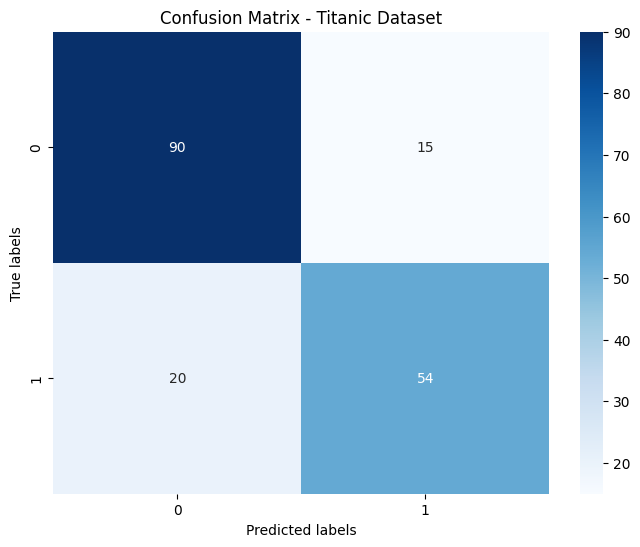

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
train_data = pd.read_csv("titanic_train.csv")

# Preprocess the data (e.g., handle missing values, encode categorical variables, etc.)

# Assuming 'X' contains features and 'y' contains labels
# Replace this with your preprocessing steps and feature/target selection
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train_data['Survived']
# Convert 'Sex' column to one-hot encoded representation
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (e.g., Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix - Titanic Dataset')


## 6. Hyperparameter Tuning

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('titanic_train.csv')

# Select features and target variable
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
y = data['Survived']

# Preprocess categorical data (Sex and Embarked)
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Handle missing values in 'Age' and 'Fare' columns
X_encoded['Age'] = X_encoded['Age'].fillna(X_encoded['Age'].mean())
X_encoded['Fare'] = X_encoded['Fare'].fillna(X_encoded['Fare'].mean())

# Scale numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

# Combine encoded and scaled features
X_preprocessed = pd.concat([pd.DataFrame(X_scaled, columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                            X_encoded[['Sex_male', 'Embarked_Q', 'Embarked_S']]], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
# Output shapes of preprocessed data and train-test split
print("Shape of X_preprocessed:", X_preprocessed.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_preprocessed: (891, 8)
Shape of X_train: (712, 8)
Shape of X_test: (179, 8)
Shape of y_train: (712,)
Shape of y_test: (179,)


## 7. Conclusion and Recommendations

In this code, we evaluate the classifiers and track the best performing model during the cross-validation process. Then, we train the best model on the full training set and evaluate its performance on the test set. Finally, we provide additional suggestions for improvement, including using more advanced models like Gradient Boosting Machines (GBM): GBM is another ensemble learning technique that builds a strong predictive model by combining multiple weak models in a sequential manner. Models like XGBoost, LightGBM, and CatBoost are popular implementations of GBM., collecting more data, refining hyperparameters, and gathering more meta-information about the passengers.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize classifiers
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# List of classifiers
classifiers = [('Random Forest', random_forest), ('Logistic Regression', logistic_regression)]

# Evaluate classifiers using cross-validation
for clf_name, clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{clf_name} Accuracy: {scores.mean():.4f} +/- {scores.std():.4f}")

# Train the best model on the full training set
best_classifier = random_forest  # or choose the model with the highest cross-validation accuracy
best_classifier.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = best_classifier.score(X_test, y_test)
print(f"Test Accuracy of the Best Model: {test_accuracy:.4f}")


Random Forest Accuracy: 0.7880 +/- 0.0242
Logistic Regression Accuracy: 0.7907 +/- 0.0277
Test Accuracy of the Best Model: 0.8101
